### A Little Notebook-Fu

Unordered list:

  * item 1
  * item 2
  * item 3
  
Order list:
 
   1.  item 1
   1. item 2
   2. item
   
We can have links:  [here's a common website](http://www.slashdot.org)

You can use latex:  $\LaTeX$  $y=\beta_1 x + \beta_0$

Some html:  <font color="red">HELLO WORLD</font>

In [5]:
30 + 50

x = 10

for i in range(3):
    print i
    
42

0
1
2


42

### General Imports

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import numpy.linalg as nla

# display graphics in the browser window
# "cell magics"  %%
# "line magics" % 
%matplotlib inline

### A Little Old-School Linear Regression

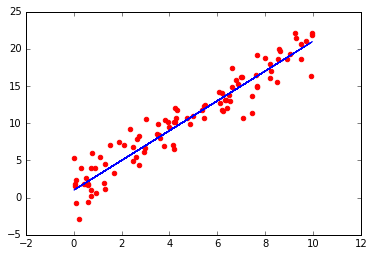

In [7]:
n_obs = 100
n_ftr = 1
def f(x):
    return 1 + np.dot(x, 2**np.arange(1,n_ftr+1))

X = np.random.uniform(0,10,(n_obs,n_ftr))
noise = np.random.normal(0.0, 2.0, n_obs)

Y = f(X) + noise

plt.scatter(X,Y,color='r')
plt.plot(X,f(X), 'b')

474.117418841
3415.29445972


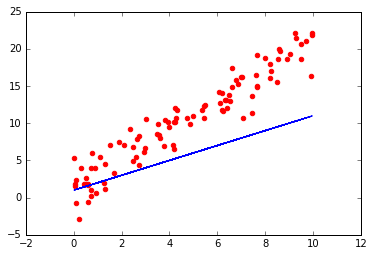

In [8]:
beta_hat_a = np.ones(n_ftr+1)

plt.scatter(X,Y,color='r')
pred_a = beta_hat_a[0] + np.dot(X,beta_hat_a[1:])

plt.plot(X,pred_a, 'b')

errors_a = Y - pred_a
print errors_a.sum()
print np.dot(errors_a, errors_a)

In [11]:
X[:10]

array([[ 9.97547775],
       [ 7.04804716],
       [ 4.1325888 ],
       [ 5.45325541],
       [ 7.01295549],
       [ 4.24945727],
       [ 7.6561181 ],
       [ 6.39900349],
       [ 5.35178548],
       [ 0.03994982]])

In [12]:
D = np.hstack((np.ones((n_obs, 1)), X))
D[:10]

array([[ 1.        ,  9.97547775],
       [ 1.        ,  7.04804716],
       [ 1.        ,  4.1325888 ],
       [ 1.        ,  5.45325541],
       [ 1.        ,  7.01295549],
       [ 1.        ,  4.24945727],
       [ 1.        ,  7.6561181 ],
       [ 1.        ,  6.39900349],
       [ 1.        ,  5.35178548],
       [ 1.        ,  0.03994982]])

In [13]:
mle_betas = nla.lstsq(D,Y)[0]
print mle_betas

[ 1.35519951  1.94937471]


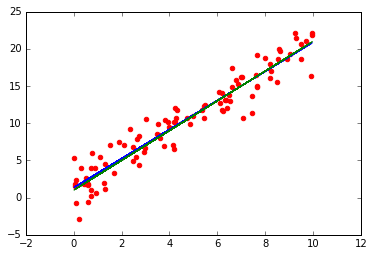

In [14]:
plt.scatter(X,Y,color='r')
pred_mle = mle_betas[0] + np.dot(X, mle_betas[1:])
plt.plot(X, pred_mle,'b')
plt.plot(X,f(X), 'g')

In [15]:
errors_mle = Y - pred_mle
print np.dot(errors_mle, errors_mle)

333.866236561


### Some Pandas

In [17]:
heights = pd.Series([86.1, 65.7, 167])
weights = pd.Series([180, 167, 127])

appointments = pd.Series([pd.datetime(2012, 10, 5),
                        pd.datetime(2009, 5, 11),
                        pd.datetime(2007, 8, 18)])
names = pd.Series(["Mark", "Barb", "Ethan"])

In [19]:
print heights
print appointments

0     86.1
1     65.7
2    167.0
dtype: float64
0   2012-10-05
1   2009-05-11
2   2007-08-18
dtype: datetime64[ns]


In [20]:
weights = pd.Series([86.1, 65.7, 29.45], 
                    index=['Mark', 'Barb', 'Ethan'])
print weights

Mark     86.10
Barb     65.70
Ethan    29.45
dtype: float64


In [24]:
heights = pd.Series([180, 167, 127], index=names)
df = pd.DataFrame({"weight":weights, "height":heights})
df

,height,weight
Mark,180,86.10
Barb,167,65.70
Ethan,127,29.45


In [25]:
bmis = df['weight'] / (df['height']/100.0)**2

In [26]:
bmis

Mark     26.574074
Barb     23.557675
Ethan    18.259037
dtype: float64

In [27]:
df['BMI'] = bmis
df

,height,weight,BMI
Mark,180,86.10,26.574074
Barb,167,65.70,23.557675
Ethan,127,29.45,18.259037


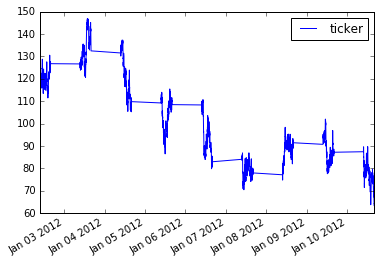

In [28]:
# 10 days of 1 minute times
baseRange = pd.date_range('2012-01-02', '2012-01-11', freq="1min")
# select 9:30AM-4:00PM only
dailyRange = baseRange[baseRange.indexer_between_time('9:30','16:00')]
tickerPoints = len(dailyRange)

# simulate a random walk from 123.7 
tickerData = np.cumsum(np.random.randn(tickerPoints)) + 123.7

# put it together in a DataFrame and graph it
testDataFrame = pd.DataFrame({"ticker":tickerData}, index = dailyRange)
testDataFrame.plot();

In [32]:
tdf = testDataFrame
grouper = tdf.groupby(pd.TimeGrouper(freq='D'))
daily = grouper.aggregate({"ticker": {"open"  : "first",
                                       "close" : "last",
                                       "high"  : "max",
                                      "low"   : "min"}})
#testDataFrame.groupby(pd.TimeGrouper(freq='D')).aggregate({"ticker": "ohlc"})
# daily
daily.columns=daily.columns.droplevel(0)
daily['range'] = daily['high'] - daily['low']
daily

,high,close,open,low,range
2012-01-02,130.532764,126.752240,123.442458,111.456287,19.076477
2012-01-03,146.937769,132.471072,126.641920,120.616325,26.321443
2012-01-04,137.298030,109.799832,131.538909,105.275301,32.022729
2012-01-05,115.465630,108.472348,109.219996,86.483482,28.982148
2012-01-06,110.647497,82.972294,108.329004,79.848754,30.798743
2012-01-07,86.942779,77.979921,84.067164,70.469831,16.472948
2012-01-08,98.366454,91.451231,77.153737,74.789223,23.577231
2012-01-09,102.013130,87.212105,90.744369,77.629750,24.383380
2012-01-10,89.728238,67.289447,87.446054,63.204264,26.523974


In [33]:
daily.to_excel('daily_data.xlsx')
revived = pd.read_excel('./daily_data.xlsx', 0) # file, sheet num.
revived

,high,close,open,low,range
2012-01-02,130.532764,126.752240,123.442458,111.456287,19.076477
2012-01-03,146.937769,132.471072,126.641920,120.616325,26.321443
2012-01-04,137.298030,109.799832,131.538909,105.275301,32.022729
2012-01-05,115.465630,108.472348,109.219996,86.483482,28.982148
2012-01-06,110.647497,82.972294,108.329004,79.848754,30.798743
2012-01-07,86.942779,77.979921,84.067164,70.469831,16.472948
2012-01-08,98.366454,91.451231,77.153737,74.789223,23.577231
2012-01-09,102.013130,87.212105,90.744369,77.629750,24.383380
2012-01-10,89.728238,67.289447,87.446054,63.204264,26.523974


In [36]:
?daily.to_excel

In [37]:
?str.split